# Requirements

- pandas
- numpy
- matplotlib
- seaborn

# General imports and settings

In [1]:
#%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import textwrap
import warnings
import pylab
import seaborn as sns
import operator

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')
# Set number of relevant rows
rows = 425000

# Data loading

In [3]:
## load data
#dat = pd.read_csv('../../Dataset/Text-Data/CrowdGuru-Demographic.csv') 
#dat_results = pd.read_csv('../../Dataset/Text-Data/CrowdGuru-Ratings.csv') 
dat_results  = pd.read_excel(open('../../Dataset/Text-Data/CrowdGuru-Ratings.xlsx', 'rb')) 

dat  = pd.read_excel(open('../../Dataset/Text-Data/CrowdGuru-Demographic.xlsx', 'rb')) 

In [4]:
dat.head(5)

,Worker_ID,Geschlecht,Alter,Höchster Bildungsabschluss,Berufstätigkeit/Anstellungsverhältnis,Berufstätigkeit/Anstellungsverhältnis: Sonstiges,Wohnort
0,1,männlich,36,Hochschule (Bachelor),Angestellte*r (Vollzeit),NaN,Deutschland
1,2,weiblich,42,Hochschule (Bachelor),Angestellte*r (Vollzeit),NaN,Deutschland
2,3,weiblich,37,Hochschule (Bachelor),Angestellte*r (Teilzeit),NaN,Deutschland
3,4,weiblich,40,Abgeschlossene Berufsausbildung,Angestellte*r (Teilzeit),NaN,Österreich
4,5,weiblich,38,Abgeschlossene Berufsausbildung,Angestellte*r (Vollzeit),NaN,Deutschland


# Data generation

In [5]:
## Aggregate Data for demographic exploration
aggregation = dat_results.head(rows).groupby('Worker_ID').agg({'Rejected':['sum']})
aggregation["gender"] = [dat.loc[dat['Worker_ID'] == i].values[0][1] for i in aggregation.index.values]
aggregation["Alter"] = [dat.loc[dat['Worker_ID'] == i].values[0][2] for i in aggregation.index.values]
aggregation["job"] = [dat.loc[dat['Worker_ID'] == i].values[0][4] for i in aggregation.index.values]
aggregation.columns = ['rejected','gender','age','job']

counts = dat_results.head(rows).groupby('Worker_ID').agg({'Worker_ID':'count'})

In [6]:
# Get percent of rejected comments for all analyzed
#  comments by a worker split into male and female.
males = np.array(aggregation.rejected[aggregation.gender=="männlich"]) / np.array(counts.Worker_ID[aggregation.gender=="männlich"])
females = np.array(aggregation.rejected[aggregation.gender=="weiblich"]) / np.array(counts.Worker_ID[aggregation.gender=="weiblich"])

In [7]:
# Get distribution of different professions split by gender
c = Counter(dat["Berufstätigkeit/Anstellungsverhältnis"][dat["Geschlecht"]=="männlich"])
berufe_männer =  sorted(c.items())
print("Professions of men:")
print(berufe_männer)
labels_m, values_m = zip(*berufe_männer)
c = Counter(dat["Berufstätigkeit/Anstellungsverhältnis"][dat["Geschlecht"]=="weiblich"])
berufe_frauen = sorted(c.items())
print("Professions of women")
print(berufe_frauen)
labels_w, values_w = zip(*berufe_frauen)

c = Counter(dat["Berufstätigkeit/Anstellungsverhältnis"][dat["Geschlecht"]=="divers"])
berufe_divers = sorted(c.items())
print("Professions of diverse")
print(berufe_divers)
labels_d, values_d = zip(*berufe_divers)
values_d= [1,0,0,0,0,1,0,0]

Professions of men:
[('Angestellte*r (Teilzeit)', 21), ('Angestellte*r (Vollzeit)', 103), ('Auszubildende*r', 2), ('Erwerbslos', 15), ('Renter*in', 21), ('Selbständig', 75), ('Sonstiges', 3), ('Student*in', 60)]
Professions of women
[('Angestellte*r (Teilzeit)', 42), ('Angestellte*r (Vollzeit)', 61), ('Auszubildende*r', 2), ('Erwerbslos', 26), ('Renter*in', 18), ('Selbständig', 121), ('Sonstiges', 2), ('Student*in', 29)]
Professions of diverse
[('Angestellte*r (Teilzeit)', 1), ('Selbständig', 1)]


## Demographic Data

In [8]:
from scipy.stats import mannwhitneyu
print(f"Maximum percentage of rejected comments for all analyzed by a male: {np.max(males)}")
print(f"Maximum percentage of rejected comments for all analyzed by a female:{np.max(females)}")
print(f"Median percentage of rejected comments for all analyzed by a male: {np.median(males)}")
print(f"Median percentage of rejected comments for all analyzed by a female: {np.median(females)}")
print(f"Number of male crowdworkers: {len(males)}")
print(f"Number of female crowdworkers: {len(females)}")
mannwhitneyu_result = mannwhitneyu(males,females)
print(f"Mannwhitneyu statistic: {mannwhitneyu_result[0]}")
print(f"Mannwhitneyu pvalue: {mannwhitneyu_result[1]}")

Maximum percentage of rejected comments for all analyzed by a male: 0.85
Maximum percentage of rejected comments for all analyzed by a female:0.775
Median percentage of rejected comments for all analyzed by a male: 0.0821764705882353
Median percentage of rejected comments for all analyzed by a female: 0.102
Number of male crowdworkers: 300
Number of female crowdworkers: 301
Mannwhitneyu statistic: 38140.0
Mannwhitneyu pvalue: 0.0004949715995089918


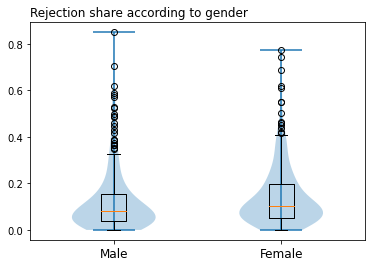

In [9]:
def generate_male_female_box_violinplot(ax, title):
    ax.violinplot([males,females])
    ax.boxplot([males,females])
    # np.array(aggregation.rejected[aggregation.gender=="weiblich"])])
    # plt.yscale('sqrt')
    ax.set_xticks([1,2])
    ax.set_xticklabels(["Male","Female"], fontsize=12)
    ax.set_title(label=title, loc= 'left')

fig, ax = plt.subplots()
generate_male_female_box_violinplot(ax, title="Rejection share according to gender")
plt.show()


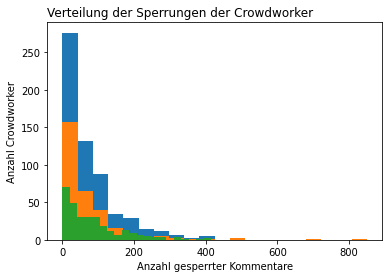

In [10]:
##Verteilung Sperrungen/Alter
def generate_reject_age_barplot(ax, title, xlabel, ylabel):
    custom_bins=[0,10,20,30,40,50,60,70,80,90]
    ax.hist(aggregation.rejected,bins=20)
    ax.hist(aggregation.rejected[aggregation.gender=="männlich"],bins=20)
    ax.hist(aggregation.rejected[aggregation.gender=="weiblich"],bins=20)
    ax.set_title(label=title, loc= 'left')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
fig, ax = plt.subplots()
generate_reject_age_barplot(ax, 
                            title="Verteilung der Sperrungen der Crowdworker", 
                            xlabel="Anzahl gesperrter Kommentare", 
                            ylabel="Anzahl Crowdworker")
plt.show()

In [11]:
def generate_gender_rejection(ax):
    
    sns.distplot(aggregation.rejected[aggregation.gender=="männlich"], hist=True, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="male",
                 kde_kws={'linewidth': 3})
    textdist = sns.distplot(aggregation.rejected[aggregation.gender=="weiblich"], hist=True, kde=True, 
                 bins=int(180/5), 
                 label="female",
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 3})
    #textdist.legend()
    #ax=textdist


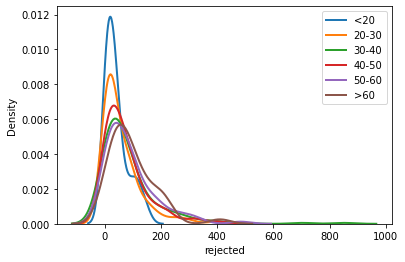

In [12]:

def generate_age_rejection(ax):
    
    sns.distplot(aggregation.rejected[aggregation.age<=20], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="<20",
                 kde_kws={'linewidth': 2})
    
    sns.distplot(aggregation.rejected[np.logical_and( aggregation.age>20,aggregation.age <=30)], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="20-30",
                 kde_kws={'linewidth': 2})
    
    sns.distplot(aggregation.rejected[np.logical_and( aggregation.age>30,aggregation.age <=40)], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="30-40",
                 kde_kws={'linewidth': 2})
    sns.distplot(aggregation.rejected[np.logical_and( aggregation.age>40,aggregation.age <=50)], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="40-50",
                 kde_kws={'linewidth': 2})
    sns.distplot(aggregation.rejected[np.logical_and( aggregation.age>50,aggregation.age <=60)], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="50-60",
                 kde_kws={'linewidth': 2})
    sns.distplot(aggregation.rejected[aggregation.age>60], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label=">60",
                 kde_kws={'linewidth': 2})
  
    #textdist.legend()
    #ax=textdist
fig, ax = plt.subplots()

generate_age_rejection(ax)
plt.legend()

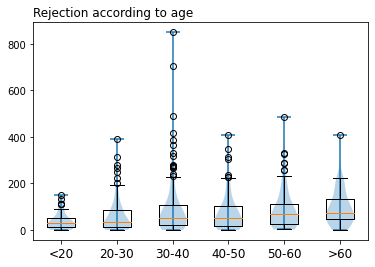

In [13]:
v20 = aggregation.rejected[aggregation.age<=20]
v30 = aggregation.rejected[np.logical_and( aggregation.age>20,aggregation.age <=30)]
v40 = aggregation.rejected[np.logical_and( aggregation.age>30,aggregation.age <=40)]
v50 = aggregation.rejected[np.logical_and( aggregation.age>40,aggregation.age <=50)]
v60 = aggregation.rejected[np.logical_and( aggregation.age>50,aggregation.age <=60)]
vold = aggregation.rejected[aggregation.age>60]

def generate_age_box_violinplot(ax, title):
    ax.violinplot([v20,v30,v40,v50,v60,vold])
    ax.boxplot([v20,v30,v40,v50,v60,vold])
    # np.array(aggregation.rejected[aggregation.gender=="weiblich"])])
    # plt.yscale('sqrt')
    ax.set_xticks([1,2,3,4,5,6])
    ax.set_xticklabels(["<20","20-30","30-40","40-50","50-60",">60"], fontsize=12)
    ax.set_title(label=title, loc= 'left')

fig, ax = plt.subplots()
generate_age_box_violinplot(ax, title="Rejection according to age")
plt.show()


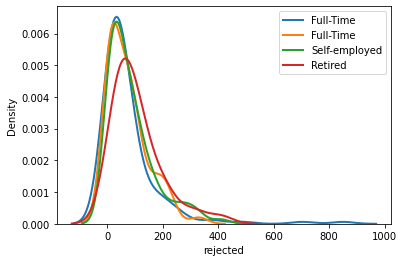

In [14]:
def generate_employment_rejection(ax):
    
    sns.distplot(aggregation.rejected[aggregation.job=='Angestellte*r (Vollzeit)'], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="Full-Time",
                 kde_kws={'linewidth': 2})
    
    sns.distplot(aggregation.rejected[aggregation.job=='Angestellte*r (Teilzeit)'], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="Full-Time",
                 kde_kws={'linewidth': 2})
    
    sns.distplot(aggregation.rejected[aggregation.job=='Selbständig'], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="Self-employed",
                 kde_kws={'linewidth': 2})
    
    sns.distplot(aggregation.rejected[aggregation.job=='Renter*in'], hist=False, kde=True, 
                 bins=int(180/5), 
                 hist_kws={'edgecolor':'black'},
                 label="Retired",
                 kde_kws={'linewidth': 2})

fig, ax = plt.subplots()

generate_employment_rejection(ax)
plt.legend()



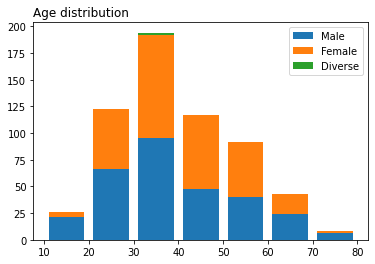

In [15]:
## Verteilung Alter
def generate_age_distribution(ax, title):
    custom_bins = [10, 20, 30, 40,50,60,70,80]

    ax.hist([dat[dat.Geschlecht=="männlich"]["Alter"],dat[dat.Geschlecht=="weiblich"]["Alter"],dat[dat.Geschlecht=="divers"]["Alter"]], 
        bins=custom_bins,histtype="bar", rwidth=0.8, stacked=True,
        label=["Male","Female","Diverse"])
    ax.set_title(label=title, loc= 'left')
    ax.legend()

fig, ax = plt.subplots()
generate_age_distribution(ax, title="Age distribution")
plt.show()

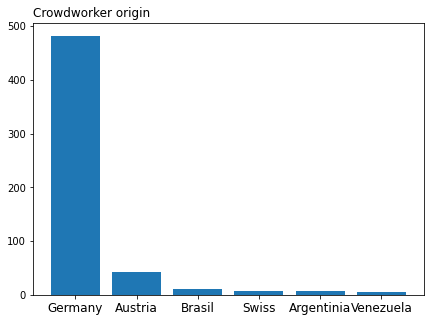

In [16]:
## wohnort
def generate_crowdworker_origin(ax, title, labels):
    i,z= zip(*sorted(Counter(dat["Wohnort"]).items(), key=operator.itemgetter(1)))
    ax.bar(i[::-1][0:6],z[::-1][0:6])
    ax.set_title(label=title, loc= 'left')
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels(labels, fontsize=12)

fig, ax = plt.subplots(figsize=[7,5])
generate_crowdworker_origin(ax, title="Crowdworker origin", labels=["Germany","Austria","Brasil","Swiss","Argentinia","Venezuela"])
plt.show()

## Sperrungsverhalten

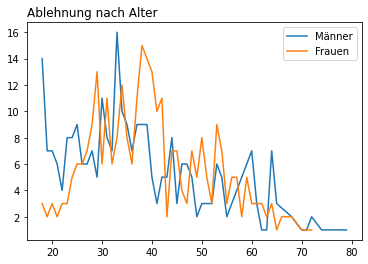

In [17]:
#list(aggregation.columns) 
def generate_rejection_age_distribution(ax, title):
    regroup = aggregation.groupby(['gender','age']).agg({'rejected':['count']}).reset_index()
    regroup[regroup["gender"]=='männlich']
    np.array(regroup[regroup["gender"]=='männlich']["age"])

    p1=ax.plot(np.array(regroup[regroup["gender"]=='männlich']["age"]),
        np.array(regroup[regroup["gender"]=='männlich']["rejected"]))
    p2=ax.plot(np.array(regroup[regroup["gender"]=='weiblich']["age"]),
        np.array(regroup[regroup["gender"]=='weiblich']["rejected"]))
    ax.legend((p1[0], p2[0]), ('Männer', 'Frauen'))
    ax.set_title(label=title, loc= 'left')

fig, ax = plt.subplots()
generate_rejection_age_distribution(ax, title="Ablehnung nach Alter")
plt.show()

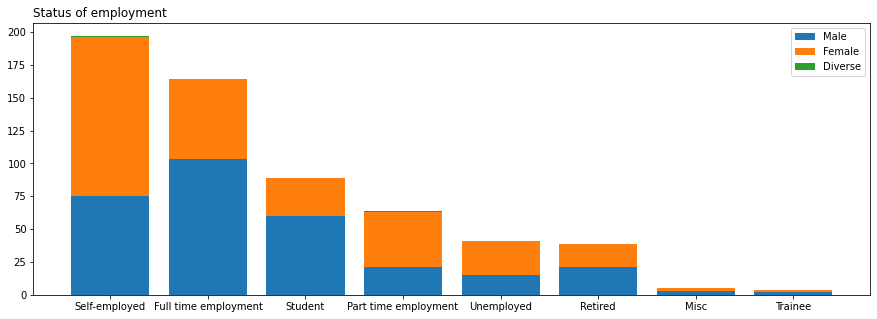

In [18]:
def generate_employment_barplot(ax, title, labels):
    ## sort indices
    indi = np.argsort(-(np.array(values_w) + np.array(values_m) + np.array(values_d)))
    indexes = np.arange(len(labels_m))
    p1 = ax.bar(indexes, np.array(values_m)[indi])
    p2 = ax.bar(indexes, np.array(values_w)[indi],bottom=np.array(values_m)[indi])
    p3 = ax.bar(indexes, np.array(values_d)[indi],bottom=(np.array(values_w) + np.array(values_m))[indi])
    ax.legend((p1[0], p2[0],p3[0]), ('Male', 'Female',"Diverse"))
    ax.set_xticks(indexes)
    ax.set_xticklabels(labels)
    ax.set_title(label=title, loc= 'left')
    
fig, ax = plt.subplots(figsize=[15,5])
generate_employment_barplot(ax, title="Status of employment", labels=["Self-employed","Full time employment","Student","Part time employment","Unemployed","Retired","Misc","Trainee"])
plt.show()

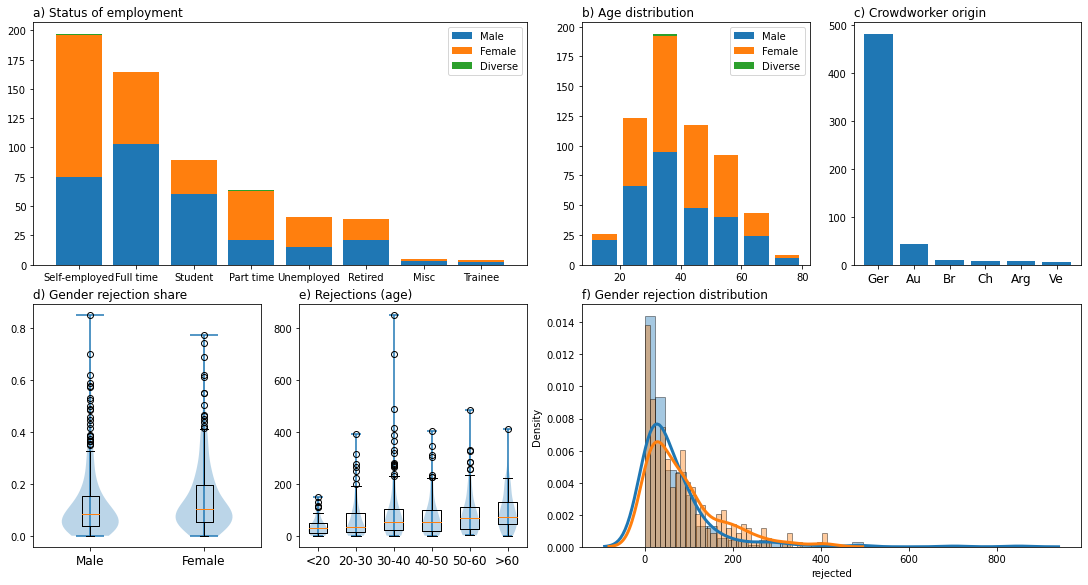

In [19]:
fig3 = plt.figure(constrained_layout=True, figsize=(15, 8))
gs = fig3.add_gridspec(2, 4)

males = np.array(aggregation.rejected[aggregation.gender=="männlich"]) /   np.array(counts.Worker_ID[aggregation.gender=="männlich"])
females = np.array(aggregation.rejected[aggregation.gender=="weiblich"]) / np.array(counts.Worker_ID[aggregation.gender=="weiblich"])

f3_ax1 = fig3.add_subplot(gs[1, 0])
generate_male_female_box_violinplot(f3_ax1, title="d) Gender rejection share")

f3_ax2 = fig3.add_subplot(gs[0, 2:3])
generate_age_distribution(f3_ax2, title="b) Age distribution")

f3_ax3 = fig3.add_subplot(gs[0, 3])
generate_crowdworker_origin(f3_ax3, title="c) Crowdworker origin", labels=["Ger","Au","Br","Ch","Arg","Ve"])

f3_ax4 = fig3.add_subplot(gs[0,0:2])
generate_employment_barplot(f3_ax4, title="a) Status of employment", labels=["Self-employed","Full time","Student","Part time","Unemployed","Retired","Misc","Trainee"])

f3_ax5 = fig3.add_subplot(gs[1,2:])
f3_ax5.set_title("f) Gender rejection distribution", loc="left")
generate_gender_rejection(f3_ax5)

f3_ax6 = fig3.add_subplot(gs[1,1:2])
generate_age_box_violinplot(f3_ax6,"e) Rejections (age)")

plt.savefig("../Figures/demographics.pdf", bbox_inches='tight')

# Gender Distributions for different rejection classes

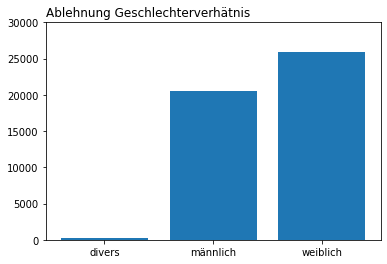

In [20]:
## gender distribution of rejection
rejected = dat_results.head(rows)[dat_results["Rejected"]>0]
rejected["gender"] = [dat.loc[i == dat["Worker_ID"]].values[0][1] for i in rejected["Worker_ID"]]
h = rejected.groupby('gender').agg({'Rejected':['count']})
h.columns = ['num']
plt.bar(h.index,h["num"])
plt.title(label="Ablehnung Geschlechterverhätnis", loc= 'left')
plt.ylim(0, 30000)
plt.show()

(0.0, 30000.0)

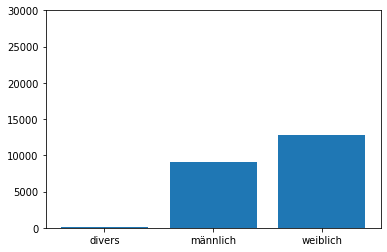

In [21]:
## gender distribution of general insult
insult = dat_results.head(rows)[dat_results["Beleidigung"]>0]
insult["gender"] = [dat.loc[i == dat["Worker_ID"]].values[0][1] for i in insult["Worker_ID"]]
h = insult.groupby('gender').agg({'Beleidigung':['sum']})
h.columns = ['num']
plt.bar(h.index,h["num"])
plt.ylim(0, 30000)

(0.0, 30000.0)

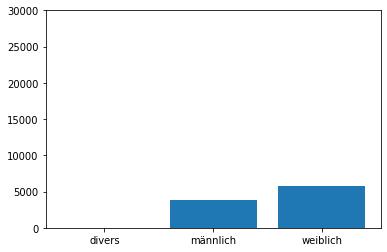

In [22]:
## gender distribution of racism
racism = dat_results.head(rows)[dat_results["Rassismus"]>0]
racism["gender"]=[dat.loc[i == dat["Worker_ID"]].values[0][1] for i in racism["Worker_ID"]]
h = racism.groupby('gender').agg({'Rassismus':['sum']})
h.columns = ['num']
plt.bar(h.index,h["num"])
plt.ylim(0, 30000)

[]

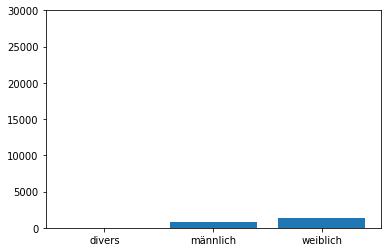

In [23]:
## gender distribution of sexism
sexism = dat_results.head(rows)[dat_results["Sexismus"]>0]
sexism["gender"] = [dat.loc[i == dat["Worker_ID"]].values[0][1] for i in sexism["Worker_ID"]]
h = sexism.groupby('gender').agg({'Sexismus':['sum']})
h.columns = ['num']
plt.bar(h.index,h["num"])
plt.ylim(0, 30000)
plt.plot()

In [24]:
degree = dat.iloc[:, [0,1,3]]
degree.columns = ["Worker_ID", "Gender", "Degree"]
degree_distribution = degree.groupby(['Gender', 'Degree']).agg({'Worker_ID':['count']}).unstack(0, fill_value=0)
degree_distribution.columns = degree_distribution.columns.droplevel(0).droplevel(0)
degree_distribution["Sum"] = degree_distribution.sum(axis=1)
degree_distribution.sort_values(by="Sum", ascending=False, inplace=True)

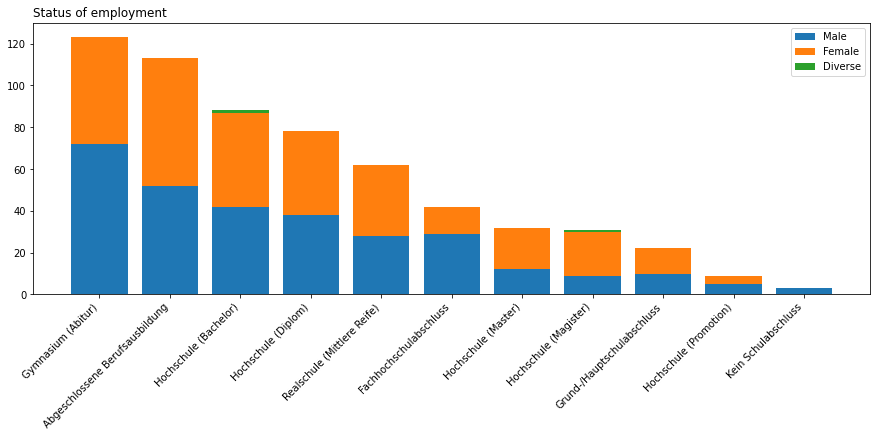

In [25]:
def generate_degree_barplot(ax, title, labels):
    ## sort indices
    indexes = np.arange(len(degree_distribution.index))
    p1 = ax.bar(indexes, np.array(degree_distribution["männlich"])[indexes])
    p2 = ax.bar(indexes, np.array(degree_distribution["weiblich"])[indexes],bottom=np.array(degree_distribution["männlich"])[indexes])
    p3 = ax.bar(indexes, np.array(degree_distribution["divers"])[indexes],bottom=np.array(np.array(degree_distribution["männlich"]) + np.array(degree_distribution["weiblich"]))[indexes])
    ax.legend((p1[0], p2[0], p3[0]), ('Male', 'Female', 'Diverse'))
    ax.set_ylim([0,np.max(degree_distribution["Sum"]) + 7])
    ax.set_xticks(indexes)
    ax.set_xticklabels(labels)
    ax.set_title(label=title, loc= 'left')
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    
fig, ax = plt.subplots(figsize=[15,5])
generate_degree_barplot(ax, title="Status of employment", labels=degree_distribution.index.to_list())
plt.show()